<a href="https://colab.research.google.com/github/AliVaghjipur/YOLOv8_Object_Detection/blob/main/ObjectDetectionUsingYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install ultralytics

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [26]:
model = YOLO("yolov8n.pt")

In [27]:
#Loading image and detecting objects
def detect_objects(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_rgb)

    # Access the first image's results
    detected_objects = results[0]  # Get results for the first image

    # Draw bounding boxes and labels on the image
    for box in detected_objects.boxes:  # Iterate through detected boxes
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        confidence = box.conf[0]  # Get confidence score
        class_id = int(box.cls[0])  # Get class ID

        # Draw bounding box
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
        # Put label
        cv2.putText(img_rgb, f'ID: {class_id} Conf: {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)  # Use the RGB image
    plt.axis('off')  # Hide axis
    plt.show()

    return results



0: 352x640 13 persons, 12 cars, 1 bus, 3 trucks, 292.5ms
Speed: 4.7ms preprocess, 292.5ms inference, 9.0ms postprocess per image at shape (1, 3, 352, 640)


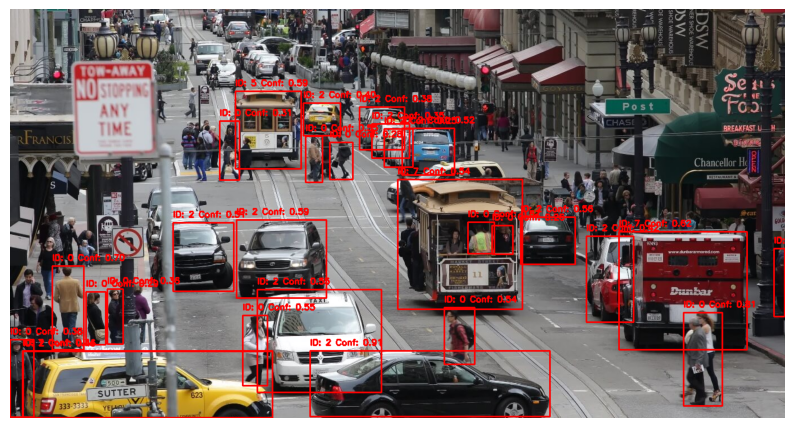

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [28]:
detect_objects('/object-recognition-using-python.jpg')  # Replace with your image path